# Actividad 2: Validación y evaluación en regresión y clasificación

Esta segunda actividad consiste en demostrar los conocimientos sobre validación y evaluación de algoritmos en aprendizaje supervisado, haciendo uso de los conceptos aprendidos en la asignatura.

Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* 60% de la nota final.

Instrucciones para cumplimentar el notebook:
* Descarga este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades, **a no ser que se especifique claramente en la celda**. Para contestar a las preguntas, por favor añade celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente (si procede responder con código), así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** en el foro o con cualquier compañero, **salvo indicación expresa en el enunciado de la actividad**. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

Información útil:
* Para crear celdas en el notebook, usa el botón "+" del menú situado en la esquina superior izquierda.
* Para ejecutar una celda (texto o código), pulsa el botón "Run" del menú situado en la esquina superior izquierda.
* Recuerda cambiar el tipo de celda de forma adecuada con el menú superior.
* Más información sobre notebooks en la documentación oficial: https://jupyter.readthedocs.io/en/latest/

In [1]:
# Librerias
import numpy as np
import pandas as pd
from math import sqrt
from pprint import pprint
from sklearn import datasets
from sklearn import preprocessing
from attrdict import AttrDict
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

### Ejercicio 1 (1.5 puntos)

Cree un programa que permita visualizar una gráfica en la que se muestren los valores de error MAE del regresor DummyRegressor en función del porcentaje de split training/test en validación Hold-out (pruebe desde un 50%-50% hasta un 95%-5%, de 5% en 5%) para un dataset de regresión (el que se desee).

###### · REGRESOR DummyRegressor

In [2]:
# Carga de datos
datos = datasets.load_boston()

In [3]:
# Algoritmo de aprendizaje
reg = DummyRegressor()

In [4]:
# Porcentajes split (trainin/test)
split = np.arange(0.05,1,0.05)

In [5]:
# Validación: hold-out split
values = []
y_pred_ = []
y_test_ = []

for i in split:
    X_train, X_test, y_train, y_test = train_test_split(datos.data, datos.target, test_size= i, random_state=0)
    
    # Entrenamiento del algoritmo de aprendizaje
    reg.fit(X_train, y_train)
    
    # Predicciones del algoritmo de aprendizaje
    y_pred = reg.predict(X_test)
   
    # Guardamos para cada split sus predicciones (y_pred), valores reales (y_test) y el error MAE
    y_pred_.append(y_pred)
    y_test_.append(y_test)
    values.append(metrics.mean_absolute_error(y_test, y_pred))

In [6]:
# Dataframe con los diferentes split y sus errores MAE correspondientes
df_split_val = pd.DataFrame({'split': split, 'MAE': values})
df_split_val

,split,MAE
0,0.05,6.607276
1,0.10,6.596682
2,0.15,6.197075
3,0.20,6.250087
4,0.25,6.262755
5,0.30,6.618127
6,0.35,6.569361
7,0.40,6.619217
8,0.45,6.550189
9,0.50,6.477786


In [7]:
# Dataframe con las predicciones y valores reales (de un split en concreto)
df_pred_real = pd.DataFrame({'Real': y_test_[0], 'Pred': y_pred_[0]})
df_pred_real

,Real,Pred
0,22.6,22.522292
1,50.0,22.522292
2,23.0,22.522292
3,8.3,22.522292
4,21.2,22.522292
5,19.9,22.522292
6,20.6,22.522292
7,18.7,22.522292
8,16.1,22.522292
9,18.6,22.522292


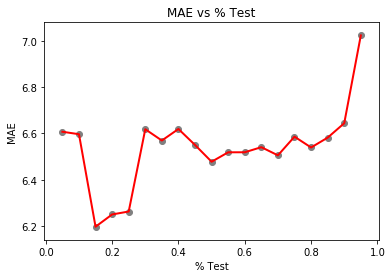

In [8]:
# Representación gráfica del error MAE en función del split
plt.scatter(split, values,  color='gray')
plt.xlabel('% Test')
plt.ylabel('MAE')
plt.title('MAE vs % Test')
plt.plot(split, values, color='red', linewidth=2)
plt.show()

>Como se puede observar en la gráfica podemos ver que aproximadamente cuanto mayor es el % de Test, mayor es el error MAE. En cambio si tenemos un % de conjunto de test menor, y por lo tanto significa que tenemos un % del conjunto de entrenamiento mayor, el valor del error MAE es ligeramente más bajo.

### Ejercicio 2 (1.5 puntos)

Realizar el mismo procedimiento que el descrito en el Ejercicio 1, pero para clasificación con el clasificador DummyClassifier (visualizar gráfica de valores de exactitud, en lugar de MAE).

###### · CLASIFICADOR DummyClassifier

In [9]:
# Carga de datos
datos = datasets.load_iris()

In [10]:
# Algoritmo de aprendizaje
clf = DummyClassifier()

In [11]:
# Porcentajes split (trainin/test)
split = np.arange(0.05,1,0.05)

In [12]:
# Validación: hold-out split
values = []
y_pred_ = []
y_test_ = []

for i in split:
    X_train, X_test, y_train, y_test = train_test_split(datos.data, datos.target, test_size= i, random_state=0)
    
    # Entrenamiento del algoritmo de aprendizaje
    clf.fit(X_train, y_train)
    
    # Predicciones del algoritmo de aprendizaje
    y_pred = clf.predict(X_test)
   
    # Guardamos para cada split sus predicciones (y_pred), valores reales (y_test) y la metrica exactitud 
    y_pred_.append(y_pred)
    y_test_.append(y_test)
    values.append(metrics.accuracy_score(y_test, y_pred))

In [13]:
# Dataframe con los diferentes split y sus métricas exactitud correspondientes
df_split_val = pd.DataFrame({'split': split, 'exactitud': values})
df_split_val

,split,exactitud
0,0.05,0.250000
1,0.10,0.400000
2,0.15,0.434783
3,0.20,0.200000
4,0.25,0.342105
5,0.30,0.422222
6,0.35,0.320755
7,0.40,0.283333
8,0.45,0.264706
9,0.50,0.346667


In [14]:
# Dataframe con las predicciones y valores reales (de un split en concreto)
df_pred_real = pd.DataFrame({'Real': y_test_[0], 'Pred': y_pred_[0]})
df_pred_real

,Real,Pred
0,2,0
1,1,0
2,0,2
3,2,2
4,0,1
5,2,1
6,0,2
7,1,1


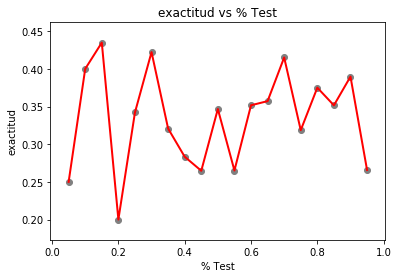

In [15]:
# Representación gráfica de la métrica exactitud en función del split
plt.scatter(split, values,  color='gray')
plt.xlabel('% Test')
plt.ylabel('exactitud')
plt.title('exactitud vs % Test')
plt.plot(split, values, color='red', linewidth=2)
plt.show()

>En este caso, con el clasificador DummyClassifier, podemos ver en la gráfica que la exactitud no esta correlacionada directamente con el % del conjunto de datos de entranamiento/test.

### Ejercicio 3 (2 puntos)

Cree un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, RMSE y MAPE usando los regresores OLS y KNN en validación cruzada con 10 bolsas. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

###### Carga de dataset (desde UCI Machine Learning Repository)

In [16]:
# Lo guardamos como un dataframe 
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data')

In [17]:
# Utilizamos la funcion "dropna" para quitar los valores Nan del dataset (en el caso de que contenga)
data = data.dropna()

In [18]:
# Visualización del dataset
data

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.00,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.00,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.00,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.00,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.00,64.0,26.82
5,6,147.0,89.0,115.0,202.0,9.0,860.0,829.0,23.00,55.0,25.21
6,7,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.00,20.0,38.86
7,8,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.50,58.5,36.59
8,9,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.50,51.0,32.71
9,10,304.0,0.0,140.0,214.0,6.0,895.0,722.0,19.00,51.0,38.46


>Este dataset tenemos que en función de los atributos para crear cemento, obtendremos 3 outputs que representan las características del cemento obtenido (SLUMP, FLOW y Compressive Strength). Nosotros solo nos quedaremos con Compressive Strength y el atributo "No" lo descartaremos, ya que no nos aporta nada.

In [19]:
# Pasamos el dataframe a diccionario (seleccionando los atributos y clases que nos interesa)
def data_processing(data):
    array = data.values
    d = array[:, 1:8]
    t = array[:, 10:11]
    
    t_ = []
    
    for i in range(len(t)):
        t_.append(t[i][0])
        
    return AttrDict({'data': d, 'target': np.array(t_)})

In [20]:
# Dataset cemento (en forma de diccionario)
datos_cemento = data_processing(data)

###### Conjunto de datos

In [21]:
# Carga de conjuntos de datos
datos = {
  'BOSTON':  datasets.load_boston(),
  'CEMENTO': datos_cemento,
  'DIABETES': datasets.load_diabetes()
}

# Claves del diccionario de datos en una lista
key_names = list(datos.keys())

# Cantidad de datos dentro del diccionario
n_datos = len(datos)

###### Métricas de evaluación

In [22]:
# Métricas de evaluación
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100}

###### Limpieza de datos

In [23]:
# Estandarización
def est(datos):
    est = StandardScaler()
    datos_prep = est.fit_transform(datos)
    return datos_prep

In [24]:
# Normalización
def normal(datos):
    normal = preprocessing.MinMaxScaler()
    datos_prep = normal.fit_transform(datos)
    return datos_prep

In [25]:
# Preprocesamiento previo de los datos
def limpieza_datos(limp):
    
    datos_prep = []

    for i in range(n_datos):
        # Estandarización:
        if limp == 'Est':
            datos_preprocesados = est(datos[key_names[i]].data)
        
        # Normalización:
        if limp == 'Norm':
            datos_preprocesados = normal(datos[key_names[i]].data)
        
        # Seleccion de atributos:
        selatr = SelectPercentile(score_func=f_regression, percentile=10)
        datos_preprocesados = selatr.fit_transform(datos_preprocesados, datos[key_names[i]].target)
    
        datos_prep.append(datos_preprocesados)
    
    return datos_prep

###### Validación y evaluación del modelo

In [26]:
# Validación y obtención de las predicciones del modelo
def val_pred_met(datos, reg, limp, n_bolsas_cv):
        
    results_ypred = []
    reults_metricas = {'MAE':[], 'RMSE':[], 'MAPE':[]}
    
    for i in range(n_datos):
        seed = 1
        
        # Nº de bolsas en validación cruzada
        if n_bolsas_cv == 'n':
                n_bolsas = len(datos[key_names[i]].data) # validación cruzada leave-one-out (nº bolsas = nº instancias)
                
        if n_bolsas_cv  != 'n':
                n_bolsas = n_bolsas_cv
                
        # Predicciones del model
        if limp == '':
            y_pred = cross_val_predict(reg, datos[key_names[i]].data, datos[key_names[i]].target, 
                               cv = KFold(n_splits=n_bolsas, random_state=seed))
        
        if limp != '':
            y_pred = cross_val_predict(reg, limpieza_datos(limp)[i], datos[key_names[i]].target, 
                                       cv = KFold(n_splits=n_bolsas, random_state=seed))
            
        # Cálculo de las métricas de evaluación.
        MAE = metricas['MAE'](datos[key_names[i]].target, y_pred)
        RMSE = metricas['RMSE'](datos[key_names[i]].target, y_pred)
        MAPE = metricas['MAPE'](datos[key_names[i]].target, y_pred)
    
         # Guardamos las predicciones del algoritmo de aprendizaje y las métricas (para cada conjunto de datos)
        results_ypred.append(y_pred)
    
        for i,j in zip((MAE, RMSE, MAPE),('MAE','RMSE','MAPE')):
            reults_metricas[j].append(i)
            
    return results_ypred, reults_metricas

###### Resultados y Representación gráfica

In [27]:
# Gráfica de realidad vs. predicción
def results(datos, reg, limp, n_bolsas_cv):
    results_ypred, reults_metricas = val_pred_met(datos,reg, limp, n_bolsas_cv)
    plt.figure(figsize=(15, 5))
    for i in range(n_datos):
        plt.subplot(1,n_datos,i+1)
        plt.scatter(datos[key_names[i]].target, results_ypred[i], edgecolors=(0, 0, 0))
        plt.plot([datos[key_names[i]].target.min(), datos[key_names[i]].target.max()], 
                 [datos[key_names[i]].target.min(), datos[key_names[i]].target.max()], 'k--', lw=4)
        plt.xlabel('Valor real de la clase \n {}'.format(key_names[i]))
        plt.ylabel('Predicción')
        plt.title("MAE: %.3f  RMSE: %.3f  MAPE: %.3f" % (reults_metricas['MAE'][i],reults_metricas['RMSE'][i],
                                                     reults_metricas['MAPE'][i]))
    
    plt.show()

###### · REGRESOR OLS

In [28]:
# Algoritmo de aprendizaje
reg_OLS = linear_model.LinearRegression()

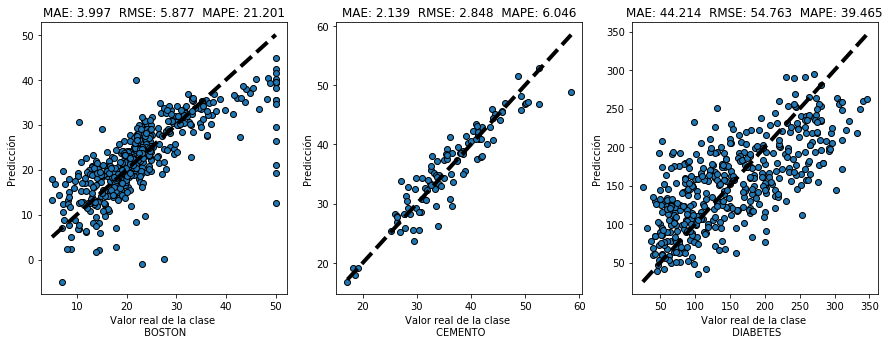

In [29]:
# Resultados
results(datos, reg_OLS, limp = '', n_bolsas_cv = 10)

>El dataset CEMENTO, el regresor OLS es en el que hace mejores predicciones ya que tenemos los valores de las métricas más bajas. El dataset de DIABETES no hace buenas predicciones debido a que sus valores de las métricas son bastante elevadas. Cabe destacar que en el dataset de BOSTON las métricas MAE y RMSE los valores son bajos y en cambio MAPE no, y vemos que en la columna 50 tenemos varias predicciones iguales, esto se podria deber a que falta información en el dataset. 

###### · REGRESOR KNN

In [30]:
# KNN
def alg_KNN(k,p):
    return KNeighborsRegressor(n_neighbors = k, p = p)

In [31]:
# Algoritmo de aprendizaje
reg_KNN = alg_KNN(k = 10, p = 1)

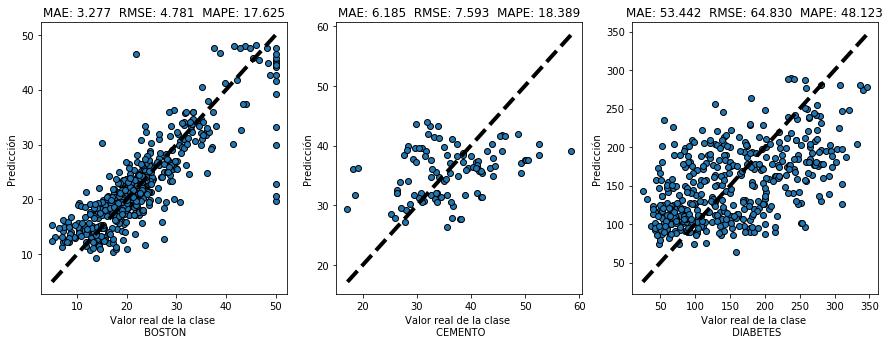

In [32]:
# Resultados
results(datos, reg_KNN, limp = 'Est', n_bolsas_cv = 10)

> Con el regresor KNN se mejoran ligeramente las métricas en el dataset de BOSTON, pero como podemos observar empeoran en los datasets de CEMENTO y DIABETES.

### Ejercicio 4 (3 puntos)

Analice las diferencias entre los errores producidos por el algoritmo KNN en función de estos aspectos: a) número de vecinos más cercanos; b) función de distancia; c) con/sin normalización previa de atributos. Para ello, pruebe al menos dos configuraciones distintas de cada aspecto. Use tres datasets diferentes en validación leave-one-out en la comparativa de resultados.

###### Vecinos

·Con k = 5 vecinos:


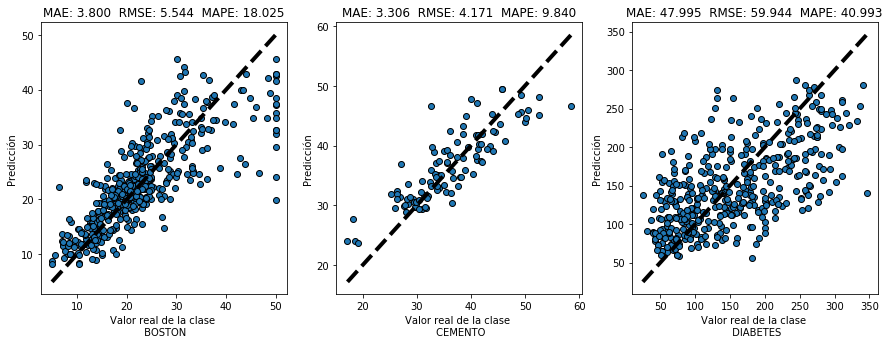

·Con k = 50 vecinos:


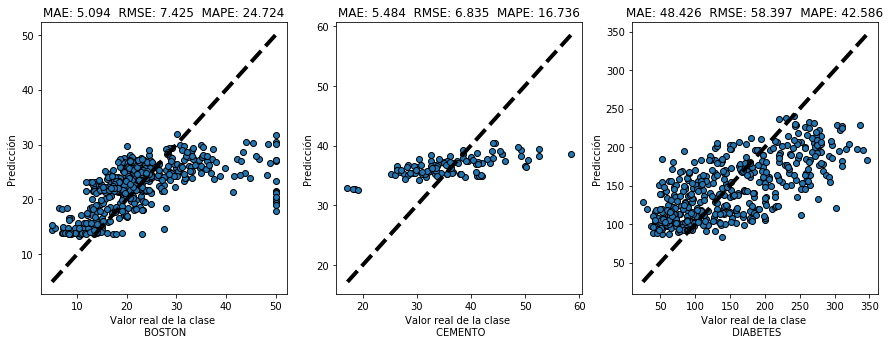

In [33]:
# a) En función de los vecinos más cercanos
k1 = 5
k2 = 50
print("·Con k = {} vecinos:".format(k1))
results(datos, alg_KNN(k = k1, p = 1) , limp = '', n_bolsas_cv = 'n')
print("·Con k = {} vecinos:".format(k2))
results(datos, alg_KNN(k = k2, p = 1) , limp = '', n_bolsas_cv = 'n')

>En general podemos ver que si el número de vecinos es más bajo, los valores de las métricas también son más bajos y por lo tanto quiere decir que el modelo hace mejores predicciones.

###### Distancia

·Con p = 1 distancia:


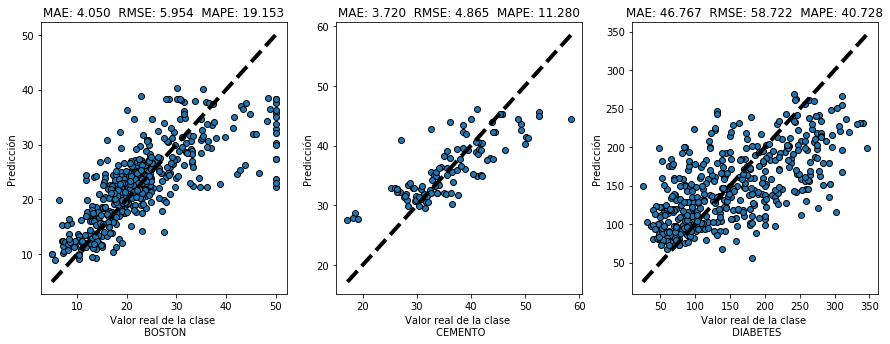

·Con p = 100 distancia:


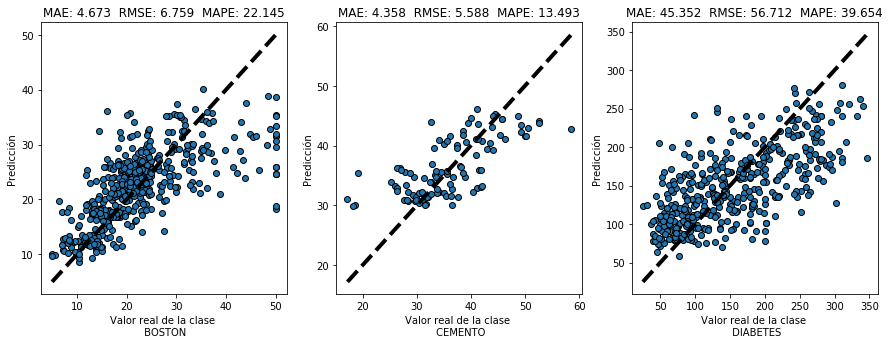

In [34]:
# b) En función de la distancia
p1 = 1
p2 = 100
print("·Con p = {} distancia:".format(p1))
results(datos, alg_KNN(k = 10, p = p1) , limp = '', n_bolsas_cv = 'n')
print("·Con p = {} distancia:".format(p2))
results(datos, alg_KNN(k = 10, p = p2) , limp = '', n_bolsas_cv = 'n')

>Cuanto mayor es la distancia obtenemos valores más elevados en las métricas, por lo tanto el modelo predice peor. Pero no hay tanta diferencia en las métricas variando la distancia, en comparación de si variamos el número de vecinos más cercanos.

###### Normailización de los atributos

·Sin normalización o estandarización previa de los atributos:


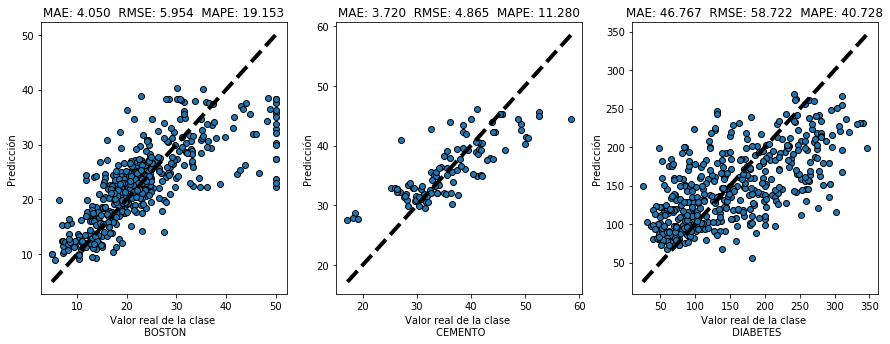

·Con normalización previa de los atributos:


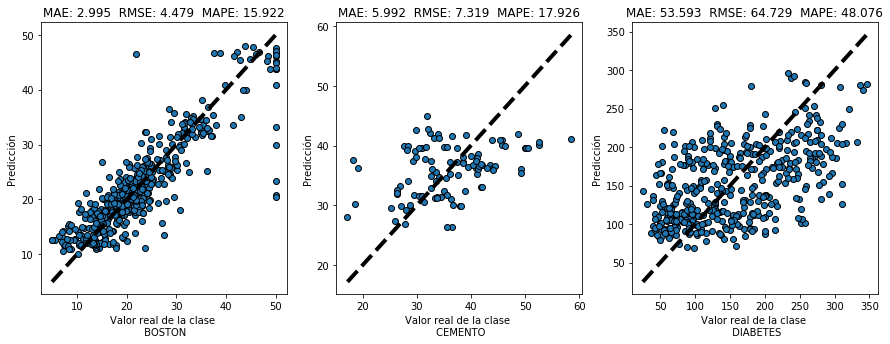

·Con estandarización previa de los atributos:


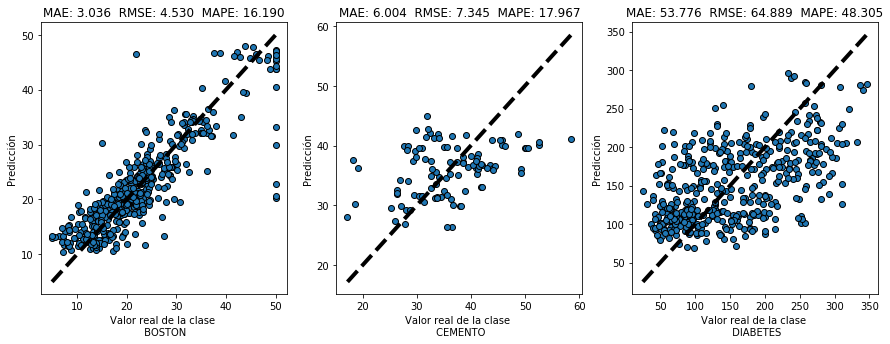

In [35]:
# c) En función de la normalización previa de los atributos 
print("·Sin normalización o estandarización previa de los atributos:")
results(datos, alg_KNN(k = 10, p = 1) , limp  = '', n_bolsas_cv = 'n')
print("·Con normalización previa de los atributos:")
results(datos, alg_KNN(k = 10, p = 1) , limp = 'Norm', n_bolsas_cv = 'n')
print("·Con estandarización previa de los atributos:")
results(datos, alg_KNN(k = 10, p = 1) , limp = 'Est', n_bolsas_cv = 'n')

>Con el datset de BOSTON, si estanderizamos o normalizamos previamente los atributos obtenemos mejores métricas. En cambio con el dataset de CEMENTO y DIABETES obtenemos peores métricas.

### Ejercicio 5 (2 puntos)

Estudie la métrica para clasificación denominada AUC de scikit-learn y cree un programa, con comentarios que aclaren el código, donde se compute diche métrica (junto con exactitud, precisión, recall y F1) usando los clasificadores LOGR y CART en validación cruzada leave-one-out. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

###### AUC y curva ROC

>__· Curva ROC__: es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros: Tasa de verdaderos positiovs y Tasa de falsos positivos.

>__· AUC__: es el área bajo la curva ROC. Y se puede definir como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. El AUC oscila en valor del 0 al 1. Un modelo cuyas predicciones son un 100% incorrectas tiene un AUC de 0.0; otro cuyas predicciones son un 100% correctas tiene un AUC de 1.0.

>Por lo tanto necesitamos que el dataset, la clase sea binaria.

>Tambien estanderizaremos los atributos porque sino el coeficiente no converge y se llegan a las máximas iteraciones.

###### Modificación de los datos

In [36]:
# Método para calcular hasta que posicion en data.target tenemos las dos clases (0,1). Lo podremos utilizar siempre y cuando
# en data.target las clases esten ordenadas correlativamente
def calculo_clases(datos):
    a = 0
    while a < 2:
        for i in range (0,(len(datos.target))-1):
            if datos.target[i] != datos.target[i+1]:
                a += 1
                if a == 2:
                     res = i+1  
    return res

In [37]:
# Modificación del dataset para quedarnos solo con los datos de 2 clases
def mod_datos(datos, s):
    datos.data = datos.data[0:s]
    datos.target = datos.target[0:s]
    datos.target_names = datos.target_names[:2] 
    return datos

###### Datos 1

In [38]:
# Carga de datos 1
datos1 = datasets.load_iris()

In [39]:
# Clase de datos 1
datos1.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

>El dataset datos1 la clase no es binaria.

In [40]:
# Modificamos el dataset para que la clase sea binaria
datos1 = mod_datos(datos1, calculo_clases(datos1))

In [41]:
# Estanderizamos los atributos
datos1.data = est(datos1.data)

###### Datos 2

In [42]:
# Carga de datos 2
datos2 = datasets.load_wine()

In [43]:
# Clase de datos 2
datos2.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

>El dataset datos2 la clase no es binaria.

In [44]:
# Modificamos el dataset para que la clase sea binaria
datos2 = mod_datos(datos2, calculo_clases(datos2))

In [45]:
# Estanderizamos los atributos
datos2.data = est(datos2.data)

###### Datos 3

In [46]:
# Carga de datos 3
datos3 = datasets.load_breast_cancer()

In [47]:
# Clase de datos 3
datos3.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

>El dataset datos3 la clase es binaria.

In [48]:
# Estanderizamos los atributos
datos3.data = est(datos3.data)

###### Algoritmos de aprendizaje

In [49]:
# Algoritmos de aprendizaje
seed = 1
alg_LOGR = LogisticRegression(solver='sag', max_iter=1000, random_state=seed,multi_class='ovr')
alg_CART = tree.DecisionTreeClassifier()

###### Métricas

In [50]:
# Métricas de evaluación.
metricas = {
  'AUC':    lambda y_true, y_pred:
            metrics.roc_auc_score(y_true, y_pred),
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred,
              average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred,
              average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')}

###### Validación y evaluación del modelo

In [51]:
# Validación y obtención de las predicciones del modelo
def eval(data, target, alg):
    n_bolsas = len(data) # validación cruzada leave-one-out (nº bolsas = nº instancias)
    seed = 1
    
    # Predicciones del modelo
    y_pred = cross_val_predict(alg, data, target, cv = KFold(n_splits=n_bolsas, random_state=seed))
    
    # Cálculo de las métricas de evaluación
    AUC = metricas['AUC'](target, y_pred)
    ACC = metricas['ACC'](target, y_pred)
    PREC = metricas['PREC'](target, y_pred)
    RECALL = metricas['RECALL'](target, y_pred)
    F1 = metricas['F1'](target, y_pred)
    
    print("· Métricas -> AUC: %.3f, ACC: %.3f, PREC: %.3f, RECALL: %.3f, F1: %.3f \n" % (AUC, ACC, PREC, RECALL, F1))
    print("· Matriz de confusión:\n%s \n" % (metrics.confusion_matrix(target, y_pred)))
    print("· Tabla de métricas:\n%s" % (metrics.classification_report(target, y_pred, digits=3)))
    print("· Curva ROC:")
    
    # Calcular la curva ROC
    fpr, tpr, threshold = metrics.roc_curve(target, y_pred)
    
    # Representación gráfica de la ruva ROC
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('AUC: %.3f' % AUC)
    plt.show()

###### · CLASIFICADOR LOGR

· Métricas -> AUC: 1.000, ACC: 1.000, PREC: 1.000, RECALL: 1.000, F1: 1.000 

· Matriz de confusión:
[[50  0]
 [ 0 50]] 

· Tabla de métricas:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.000     1.000        50

   micro avg      1.000     1.000     1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

· Curva ROC:


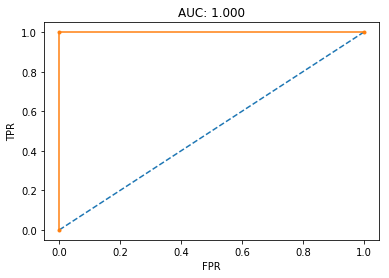

In [52]:
# Datos1
eval(data = datos1.data, target = datos1.target, alg = alg_LOGR)

>El model tiene el 100% de acierto, por lo tanto la área debajo la curva ROC es máxima (AUC = 1).

· Métricas -> AUC: 0.993, ACC: 0.992, PREC: 0.992, RECALL: 0.992, F1: 0.992 

· Matriz de confusión:
[[59  0]
 [ 1 70]] 

· Tabla de métricas:
              precision    recall  f1-score   support

           0      0.983     1.000     0.992        59
           1      1.000     0.986     0.993        71

   micro avg      0.992     0.992     0.992       130
   macro avg      0.992     0.993     0.992       130
weighted avg      0.992     0.992     0.992       130

· Curva ROC:


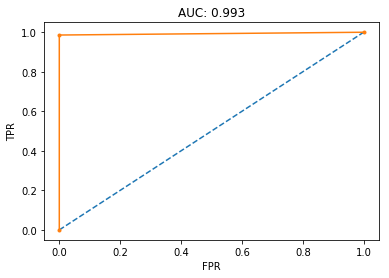

In [53]:
# Datos2
eval(data = datos2.data, target = datos2.target, alg = alg_LOGR)

>Como vemos en la matriz de confusión el modelo ha acertado todos los verdaderos positivos pero tiene un falso positivo.

· Métricas -> AUC: 0.976, ACC: 0.979, PREC: 0.979, RECALL: 0.979, F1: 0.979 

· Matriz de confusión:
[[205   7]
 [  5 352]] 

· Tabla de métricas:
              precision    recall  f1-score   support

           0      0.976     0.967     0.972       212
           1      0.981     0.986     0.983       357

   micro avg      0.979     0.979     0.979       569
   macro avg      0.978     0.976     0.977       569
weighted avg      0.979     0.979     0.979       569

· Curva ROC:


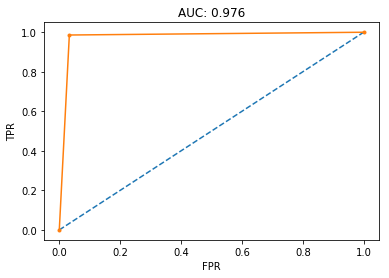

In [54]:
# Datos3
eval(data = datos3.data, target = datos3.target, alg = alg_LOGR)

> En comparación con los otros datsets, este es el que tiene el AUC más bajo. En la matriz de confusión se puede observar que tenemos 7 falsos negativos y 5 falsos positivos.

###### · CLASIFICADOR CART

· Métricas -> AUC: 1.000, ACC: 1.000, PREC: 1.000, RECALL: 1.000, F1: 1.000 

· Matriz de confusión:
[[50  0]
 [ 0 50]] 

· Tabla de métricas:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.000     1.000        50

   micro avg      1.000     1.000     1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

· Curva ROC:


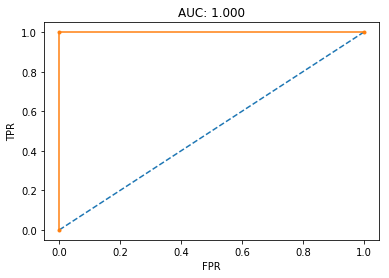

In [55]:
# Datos1
eval(data = datos1.data, target = datos1.target, alg = alg_CART)

> Con el clasificador CART al igual que con LOGR, para los datos1 tenemos que el model acierta al 100%, por lo tanto el AUC es de 1.

· Métricas -> AUC: 0.976, ACC: 0.977, PREC: 0.977, RECALL: 0.977, F1: 0.977 

· Matriz de confusión:
[[57  2]
 [ 1 70]] 

· Tabla de métricas:
              precision    recall  f1-score   support

           0      0.983     0.966     0.974        59
           1      0.972     0.986     0.979        71

   micro avg      0.977     0.977     0.977       130
   macro avg      0.977     0.976     0.977       130
weighted avg      0.977     0.977     0.977       130

· Curva ROC:


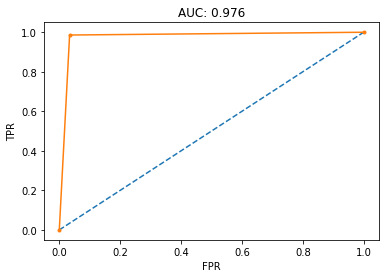

In [56]:
# Datos2
eval(data = datos2.data, target = datos2.target, alg = alg_CART)

> Aquí el AUC es peor que con el clasificador LOGR (AUC = 0.993 ). Con CART, en la matriz de confusión podemos apreciar que tenemos 2 falsos negativos y 2 falsos positivos.

· Métricas -> AUC: 0.921, ACC: 0.924, PREC: 0.924, RECALL: 0.924, F1: 0.924 

· Matriz de confusión:
[[192  20]
 [ 23 334]] 

· Tabla de métricas:
              precision    recall  f1-score   support

           0      0.893     0.906     0.899       212
           1      0.944     0.936     0.940       357

   micro avg      0.924     0.924     0.924       569
   macro avg      0.918     0.921     0.919       569
weighted avg      0.925     0.924     0.925       569

· Curva ROC:


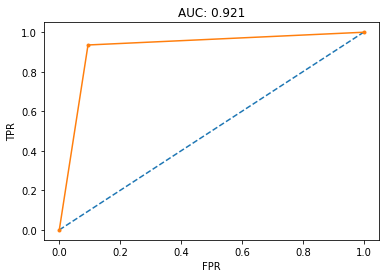

In [57]:
# Datos3
eval(data = datos3.data, target = datos3.target, alg = alg_CART)

> Al igual que con datos2, el AUC es peor que con el clasificador LOGR (AUC = 0.976 ). Con CART, en la matriz de confusión podemos observar que tenemos 19 falsos negativos y 20 falsos positivos.

###### Conclusión

>Con estos datasets vemos que clasifica mejor el clasificador LOGR que el clasificador CART. Debido a que obtenemos un AUC superior con LOGR en comparación con CART en cada uno de los datasets (excepto del primero que tienen el mismo AUC).